In [2]:
import numpy as np
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, QuantumRegister
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector

In [3]:
theta = np.pi/3
gamma = np.pi/2
psi = [np.cos((theta)/2), np.sin((theta)/2)*np.e**(1j*(gamma))]
phi = [np.cos((np.pi-theta)/2), np.sin((np.pi-theta)/2)*np.e**(1j*(gamma+np.pi))]

q = QuantumRegister(2) # build the quantum register with two qubits
qc = QuantumCircuit(q) # create the circuit starting with the register 'q'
qc.initialize(phi, q[0]) # initialize the first qubit (position 0 of the register) with the desired vector psi
qc.draw() # draw the quantum circuit

┌───────────────────────────┐
q0_0: ┤ Initialize(0.5,-0.86603j) ├
      └───────────────────────────┘
q0_1: ─────────────────────────────

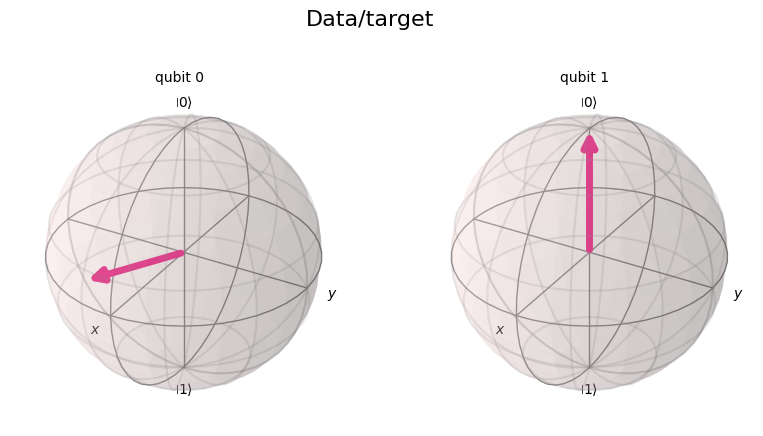

In [5]:
state = Statevector.from_instruction(qc)
plot_bloch_multivector(state, title='Data/target') # plot bloch spere for each state in at the end of the quantum circuit

In [6]:
qc.rz(-gamma,q[0]) # add a rotation operation around the Z-axis to the first qubit
qc.draw()

┌───────────────────────────┐┌──────────┐
q0_0: ┤ Initialize(0.5,-0.86603j) ├┤ Rz(-π/2) ├
      └───────────────────────────┘└──────────┘
q0_1: ─────────────────────────────────────────

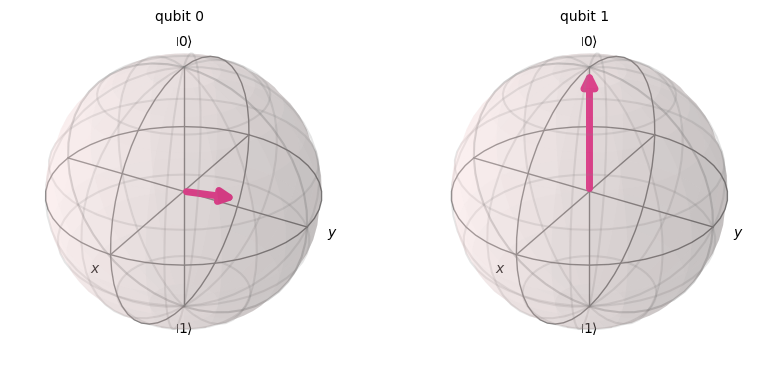

In [7]:
state = Statevector.from_instruction(qc)
plot_bloch_multivector(state)

In [8]:
qc.ry(-theta,q[0]) # add a rotation operation around the Y-axis to the first qubit
qc.draw()

┌───────────────────────────┐┌──────────┐┌──────────┐
q0_0: ┤ Initialize(0.5,-0.86603j) ├┤ Rz(-π/2) ├┤ Ry(-π/3) ├
      └───────────────────────────┘└──────────┘└──────────┘
q0_1: ─────────────────────────────────────────────────────

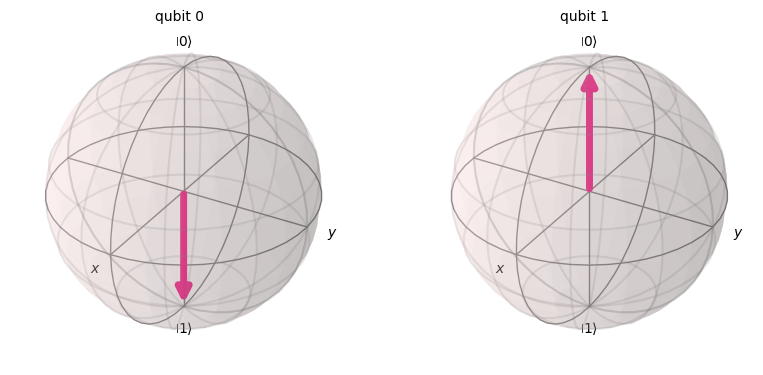

In [9]:
state = Statevector.from_instruction(qc)
plot_bloch_multivector(state)

In [10]:
qc.cx(q[0],q[1]) # add a C-NOT gate to the circuit with the first qubit as control and the second as target
qc.draw()

┌───────────────────────────┐┌──────────┐┌──────────┐     
q0_0: ┤ Initialize(0.5,-0.86603j) ├┤ Rz(-π/2) ├┤ Ry(-π/3) ├──■──
      └───────────────────────────┘└──────────┘└──────────┘┌─┴─┐
q0_1: ─────────────────────────────────────────────────────┤ X ├
                                                           └───┘

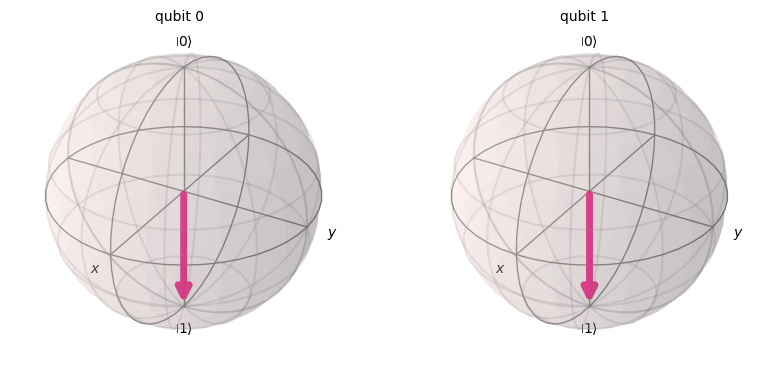

In [11]:
state = Statevector.from_instruction(qc)
plot_bloch_multivector(state)

In [12]:
qc.ry(theta,q) # add a rotation operation around the Y-axis to both qubits
qc.draw()

┌───────────────────────────┐┌──────────┐┌──────────┐     ┌─────────┐
q0_0: ┤ Initialize(0.5,-0.86603j) ├┤ Rz(-π/2) ├┤ Ry(-π/3) ├──■──┤ Ry(π/3) ├
      └───────────────────────────┘└──────────┘└──────────┘┌─┴─┐├─────────┤
q0_1: ─────────────────────────────────────────────────────┤ X ├┤ Ry(π/3) ├
                                                           └───┘└─────────┘

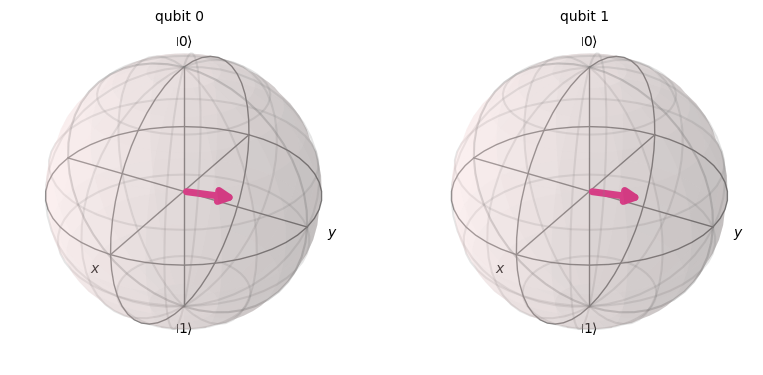

In [13]:
state = Statevector.from_instruction(qc)
plot_bloch_multivector(state)

In [14]:
qc.rz(gamma,q) # add a rotation operation around the Z-axis to both qubits
qc.draw()

┌───────────────────────────┐┌──────────┐┌──────────┐     ┌─────────┐»
q0_0: ┤ Initialize(0.5,-0.86603j) ├┤ Rz(-π/2) ├┤ Ry(-π/3) ├──■──┤ Ry(π/3) ├»
      └───────────────────────────┘└──────────┘└──────────┘┌─┴─┐├─────────┤»
q0_1: ─────────────────────────────────────────────────────┤ X ├┤ Ry(π/3) ├»
                                                           └───┘└─────────┘»
«      ┌─────────┐
«q0_0: ┤ Rz(π/2) ├
«      ├─────────┤
«q0_1: ┤ Rz(π/2) ├
«      └─────────┘

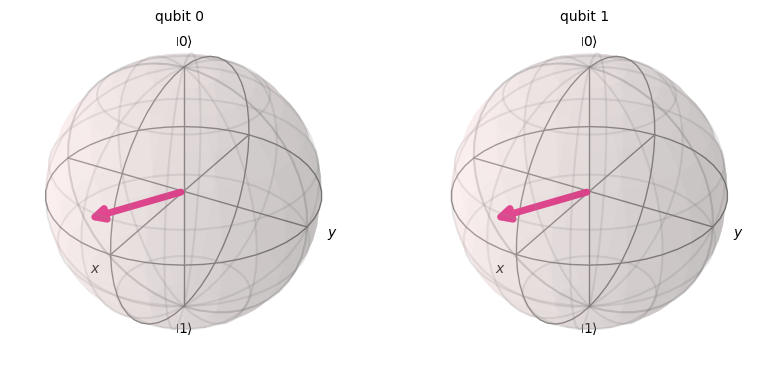

In [15]:
state = Statevector.from_instruction(qc)
plot_bloch_multivector(state)